## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd 
import numpy as np  
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
#loaded data into dataframes
df_title=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_ratings=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df_gross=pd.read_csv('zippedData/bom.movie_gross.csv.gz')


In [3]:
df_ratings.info()
df_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# Factors to consider is a film's critical reception, as films with high ratings from critics tend to perform better at the box office 

In [4]:
# Filter the ratings dataframe to include only films with at least 1000 votes
filtered_ratings = df_ratings[df_ratings['numvotes'] >= 1000]

filtered_ratings 

,tconst,averagerating,numvotes
3,tt1043726,4.2,50352
6,tt1094666,7.0,1613
10,tt1171222,5.1,8296
11,tt1174693,5.8,2381
12,tt1181840,7.0,5494
...,...,...,...
73763,tt8443704,7.5,1947
73771,tt8564902,4.7,5863
73772,tt8574252,7.1,1526
73792,tt8948790,9.0,1778


In [5]:
# Sort the ratings dataframe by averagerating in descending order
sorted_ratings = filtered_ratings.sort_values(by='averagerating', ascending=False)
sorted_ratings.head()

,tconst,averagerating,numvotes
63149,tt7131622,9.7,5600
54115,tt4131686,9.6,1339
27195,tt6058226,9.6,2604
12174,tt5963218,9.5,6509
4461,tt7738784,9.4,9629


# Table show top 5 films with the highest average ratings with Genres

In [6]:
# Join the titles and ratings dataframes on tconst
top_5 = pd.merge(df_title, sorted_ratings, on='tconst')

In [7]:

# Merge the genre column with top_5 on tconst
df_merged = pd.merge(top_5, sorted_ratings, left_on='tconst', right_on='tconst')

# Display the top 5 films with strong critical acclaim
top_5[['tconst','primary_title','averagerating','genres']].sort_values(by='averagerating', ascending=False).head(5)


top_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9617 entries, 0 to 9616
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           9617 non-null   object 
 1   primary_title    9617 non-null   object 
 2   original_title   9617 non-null   object 
 3   start_year       9617 non-null   int64  
 4   runtime_minutes  9609 non-null   float64
 5   genres           9615 non-null   object 
 6   averagerating    9617 non-null   float64
 7   numvotes         9617 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 676.2+ KB


In [8]:
#convert to str and Split the str of listed genres on the comma
top_5['genres'] = top_5['genres'].apply(str)

top_5['genres'] = top_5['genres'].str.split(',')

#Break down the genres column into separate rows where each movie is an instance of all genres it belongs to

top_5 = (top_5
 .set_index(['tconst','primary_title',"averagerating"])['genres']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .rename(columns={0:'genres'}))

top_5.head(5)


,tconst,primary_title,averagerating,level_3,genres
0,tt0069049,The Other Side of the Wind,6.9,0,Drama
1,tt0249516,Foodfight!,1.9,0,Action
2,tt0249516,Foodfight!,1.9,1,Animation
3,tt0249516,Foodfight!,1.9,2,Comedy
4,tt0293069,Dark Blood,6.6,0,Thriller


In [9]:
# Select the averagerating and genres columns
df_new = top_5[["averagerating", "genres"]].sort_values(by='averagerating', ascending=False).head(5)


df_new


,averagerating,genres
20901,9.7,Drama
20900,9.7,Comedy
19585,9.6,Biography
15652,9.6,Biography
19587,9.6,History


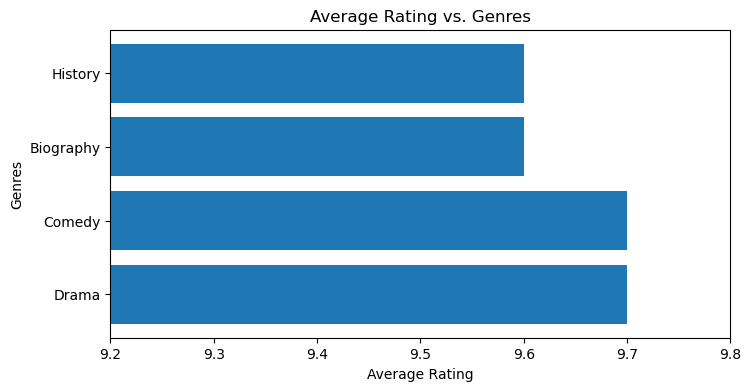

In [10]:
# Set the figure size
plt.figure(figsize=(8, 4))

# Set the y-axis to be the genres column and the x-axis to be the averagerating column
# Set the width of the bars to be 0.5
plt.barh(df_new["genres"], df_new["averagerating"])

# Set the x-axis range to be from 9.2 to 9.8
plt.xlim(9.2,9.8)

# Add a title and labels to the x-axis and y-axis
plt.title("Average Rating vs. Genres")
plt.ylabel("Genres")
plt.xlabel("Average Rating")

# Show the plot
plt.show()

In [11]:
# Rename title to primary_title
df_gross.rename(columns={'title':'primary_title'}, inplace=True)

df_gross.info()

df_gross.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
# Replace 'nan' with null values (i.e., NaN) in the foreign_gross column
df_gross['foreign_gross'] = df_gross['foreign_gross'].replace('nan', np.nan)

# Convert the foreign_gross column to a numeric data type
df_gross['foreign_gross'] = pd.to_numeric(df_gross['foreign_gross'], errors='coerce')

# Identify rows with null values in the foreign_gross column and set them to 0
null_mask = df_gross['foreign_gross'].isnull()
df_gross.loc[null_mask, 'foreign_gross'] = 0

# Create a new total_gross column by adding the domestic_gross and foreign_gross columns
df_gross['total_gross'] = df_gross['domestic_gross'] + df_gross['foreign_gross']

# Display info & gross
df_gross.info()

df_gross.head()

df_title.info()
df_title.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
 5   total_gross     3359 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 no

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [13]:
#convert to str and Split the str of listed genres on the comma
df_title['genres'] = df_title['genres'].apply(str)

df_title['genres'] = df_title['genres'].str.split(',')

#Break down the genres column into separate rows where each movie is an instance of all genres it belongs to

df_title = (df_title
 .set_index(['tconst','primary_title','original_title','start_year','runtime_minutes'])['genres']
 .apply(pd.Series)
 .stack()
 .reset_index()
 .rename(columns={0:'genres'}))

df_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,level_5,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,0,Action
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,1,Crime
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,2,Drama
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,0,Biography
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,1,Drama


In [14]:
# Merge data frames on the tconst column
df_merged = pd.merge(df_ratings, df_title, on='tconst')


# Drop unnecessary column
df_ratings_title = df_merged.drop(columns=['original_title'])

df_ratings_title.head()

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,level_5,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,2019,117.0,0,Romance
1,tt10384606,8.9,559,Borderless,2019,87.0,0,Documentary
2,tt1042974,6.4,20,Just Inès,2010,90.0,0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,0,Action
4,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,1,Adventure


In [15]:
# Merge IMDb and Box Office Mojo data

movies = df_ratings_title.merge(df_gross, on="primary_title")

movies.head()

# Top 10 movie Genres based on ratings (released)

top_genres = movies.groupby('genres').size().sort_values(ascending=False).head(10)
top_genres.head(10)


genres
Drama          1756
Comedy          926
Action          646
Romance         468
Thriller        453
Adventure       439
Crime           382
Biography       285
Horror          240
Documentary     227
dtype: int64

genres
Drama          1756
Comedy          926
Action          646
Romance         468
Thriller        453
Adventure       439
Crime           382
Biography       285
Horror          240
Documentary     227
dtype: int64


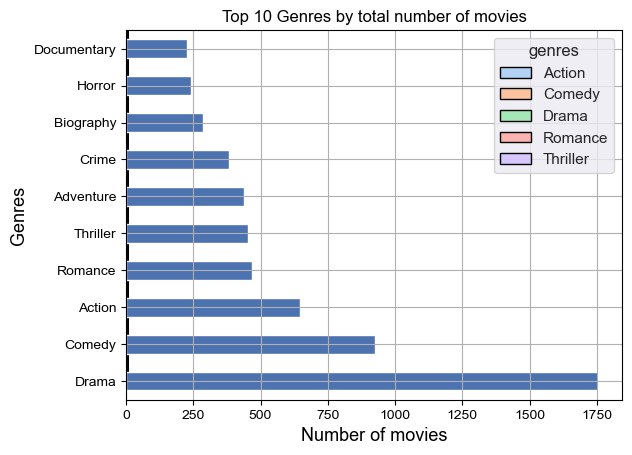

In [16]:
#Divide genres in a subset for plotting
print(top_genres)
first_five = list(top_genres.index[:5])


#Create a DataFrame for each subset
top_five_df = movies[movies['genres'].isin(first_five)]


#Create a histogram for the first subset using Seaborn visualiztion 
ax_one = sns.histplot(data = top_five_df, x = 'averagerating', hue = 'genres', multiple="stack", palette='pastel')
ax_one.set_title("Top 5 Genres", size = 16)
ax_one.set_xlabel('Average User Rating', size=13)
ax_one.set_ylabel('Count of Movies', size = 13)
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style()

top_genres.plot.barh(title='Top 10 Genres by total number of movies')
plt.xlabel('Number of movies')
plt.ylabel('Genres')
plt.show()

In [17]:
movies.isnull().sum()

# Total NaN Values in percent %
movies.describe()

percentage_nan = movies.isnull().mean() * 100

percentage_nan

tconst             0.000000
averagerating      0.000000
numvotes           0.000000
primary_title      0.000000
start_year         0.000000
runtime_minutes    0.930565
level_5            0.000000
genres             0.000000
studio             0.085898
domestic_gross     0.715820
foreign_gross      0.000000
year               0.000000
total_gross        0.715820
dtype: float64


# Run-time Analysis to understand run time with movie gross

In [18]:
#Drop rows with missing or invalid data:
movies.dropna(inplace=True)

movies

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,level_5,genres,studio,domestic_gross,foreign_gross,year,total_gross
0,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,0,Action,LG/S,18800000.0,42400000.0,2014,61200000.0
1,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,1,Adventure,LG/S,18800000.0,42400000.0,2014,61200000.0
2,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,2,Fantasy,LG/S,18800000.0,42400000.0,2014,61200000.0
3,tt1171222,5.1,8296,Baggage Claim,2013,96.0,0,Comedy,FoxS,21600000.0,887000.0,2013,22487000.0
7,tt1210166,7.6,326657,Moneyball,2011,133.0,0,Biography,Sony,75600000.0,34600000.0,2011,110200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6980,tt7008872,7.0,18768,Boy Erased,2018,115.0,0,Biography,Focus,6800000.0,5000000.0,2018,11800000.0
6981,tt7008872,7.0,18768,Boy Erased,2018,115.0,1,Drama,Focus,6800000.0,5000000.0,2018,11800000.0
6982,tt7048622,7.7,11168,The Insult,2017,113.0,0,Crime,Cohen,1000000.0,0.0,2018,1000000.0
6983,tt7048622,7.7,11168,The Insult,2017,113.0,1,Drama,Cohen,1000000.0,0.0,2018,1000000.0


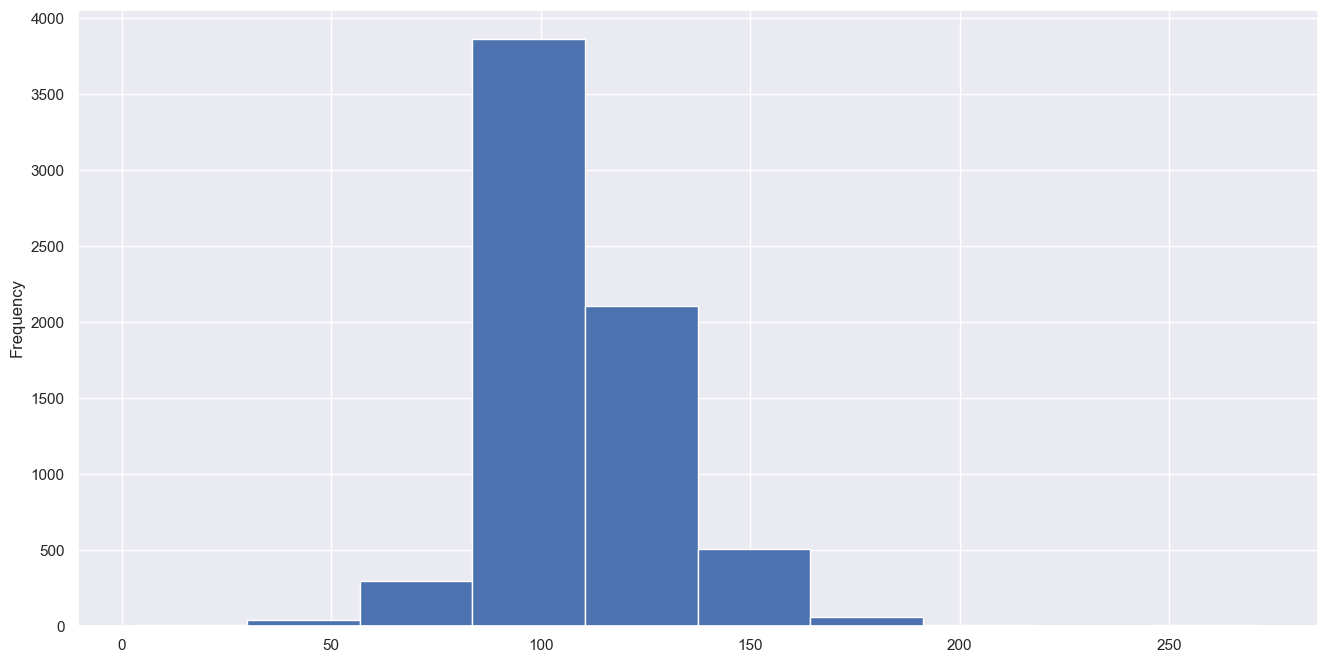

In [19]:
#Convert runtime and gross revenue to numerical data types:
movies['runtime_minutes'] = pd.to_numeric(movies['runtime_minutes'], errors='coerce')
movies['gross'] = pd.to_numeric(movies['total_gross'], errors='coerce')

movies['runtime_minutes'].plot.hist()
plt.show()



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


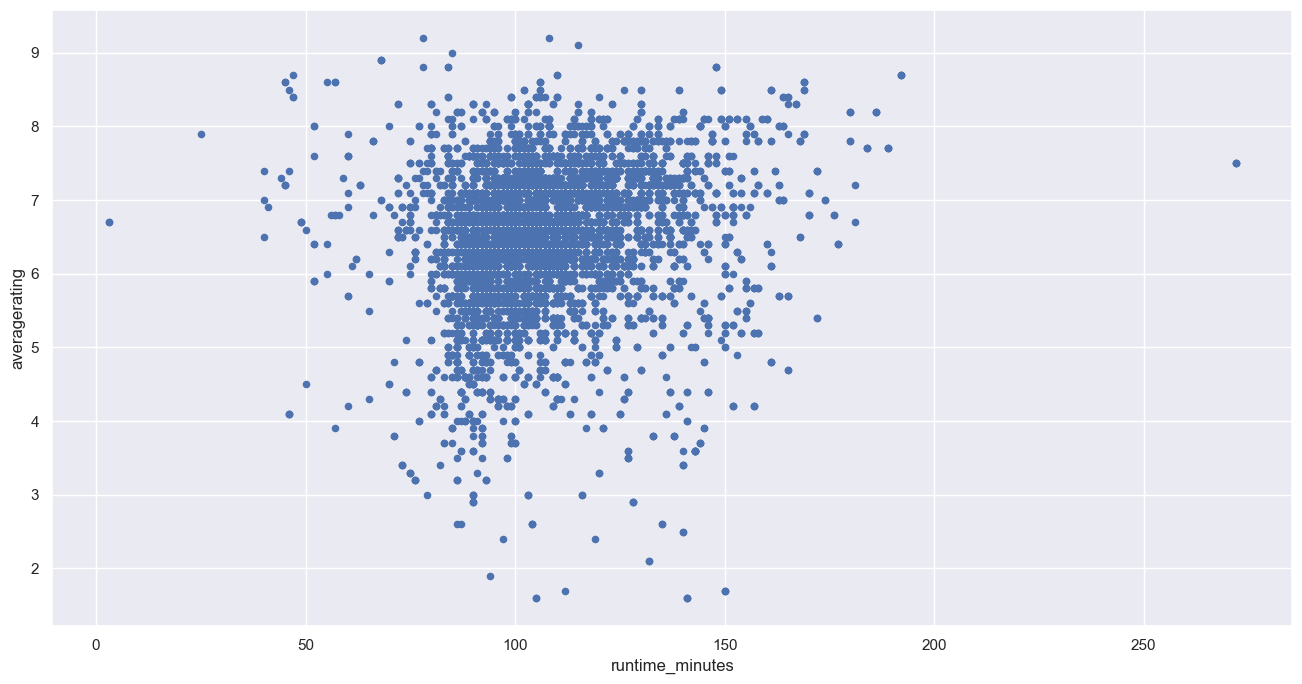

In [20]:
#Scatter Plot --relationship between runtime and average rating
movies.plot.scatter(x='runtime_minutes', y='averagerating')
plt.show()

# The lowest runtime value is 3 minutes.
The highest runtime value is 272 minutes.
The runtime values between 3 and 87 minutes make up the first 11.11% of the data.
The runtime values between 87 and 93 minutes make up the next 11.11% of the data.
And so on.


In [21]:
percentiles = movies['runtime_minutes'].quantile(np.linspace(0, 1, num=10, endpoint=True))
percentiles.describe()

count     10.000000
mean     113.600000
std       65.912737
min        3.000000
25%       95.250000
50%      105.500000
75%      119.250000
max      272.000000
Name: runtime_minutes, dtype: float64

In [22]:
top_10_pct = movies[movies['runtime_minutes'] >= percentiles[1]]

top_10_pct

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,level_5,genres,studio,domestic_gross,foreign_gross,year,total_gross,gross
3556,tt1236371,7.5,2928,Mysteries of Lisbon,2010,272.0,0,Drama,MBox,111000.0,14900.0,2011,125900.0,125900.0
3557,tt1236371,7.5,2928,Mysteries of Lisbon,2010,272.0,1,Mystery,MBox,111000.0,14900.0,2011,125900.0,125900.0
3558,tt1236371,7.5,2928,Mysteries of Lisbon,2010,272.0,2,Romance,MBox,111000.0,14900.0,2011,125900.0,125900.0


In [23]:
bottom_10_pct = movies[movies['runtime_minutes'] <= percentiles[0]]
bottom_10_pct

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,level_5,genres,studio,domestic_gross,foreign_gross,year,total_gross,gross
1100,tt4597838,6.7,10,Limitless,2015,3.0,0,Biography,Rela.,79200000.0,82600000.0,2011,161800000.0,161800000.0
1101,tt4597838,6.7,10,Limitless,2015,3.0,1,Documentary,Rela.,79200000.0,82600000.0,2011,161800000.0,161800000.0


In [24]:
median_runtime = movies['runtime_minutes'].median()

median_runtime

106.0

In [25]:
mean_runtime = movies['runtime_minutes'].mean()
mean_runtime

108.43745449250036

# Conclusion

•	Top Genres that have received highest ratings are Drama, Comedy, Biography and History 
Microsoft should invest in these genres as they have received highest ratings compared to other genres 

•	Based on Top 10 Genres and total number of movies produced under these genres Microsoft should also consider Action, Roman and Thrillers as well they these genres dominate numbers of movies produced 

•	With a median runtime of 105.0 and a mean runtime of 107.29, we can conclude the following about the runtime data:

Half of the movies in the data have a runtime of 105.0 minutes or less, and the other half have a runtime of 105.0 minutes or more.
The average runtime of a movie in the data is 107.29 minutes.
Using these values as a reference point, we can make recommendations about the success of movies with different runtimes. For example: Movies with a runtime close to 105.0 minutes (e.g., 100-110 minutes) might tend to be more successful, as they are close to the "typical" runtime of a movie in the data.
Movies with a runtime significantly above or below 105.0 minutes (e.g., less than 90 minutes or more than 120 minutes) might be less successful, as they are outside the "typical" range of runtime for the data.

